In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from keras.models import Model, load_model
import keras.backend as K
import numpy as np
import os

In [4]:
model_list = ['D:/Projects/Github/SyntheticPromoter/DanQCNNLSTM/dualcnnconcat_danq_weights/weights-28-0.51.hdf5',
              'D:/Projects/Github/SyntheticPromoter/1DdenseNet/longstem_CNN_weights/weights-22-0.53.hdf5',
              'D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/weights/weights-26-0.51.hdf5',
              'D:/Projects/Github/SyntheticPromoter/HilbertCNN/weights/1mer/modified_hilbertcnn/weights-16-0.50.hdf5'
             ]
label_list = ['Dual Conv CNN-LSTM', '1D DenseNet', 'Embedded Dual Conv CNN-LSTM', 'Hilbert Curve CNN']
roc_list = []
for i, path in enumerate(model_list):
    if i < 2:
        x_test = np.load('D:/Projects/iSynPro/iSynPro/DanQCNNLSTM/x_test.npy')
        y_test = np.load('D:/Projects/iSynPro/iSynPro/DanQCNNLSTM/y_test.npy')
    elif i == 2:
        x_test = np.load('D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/x_test.npy')
        y_test = np.load('D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/y_test.npy')
    else:
        high_path = 'D:/Projects/iSynPro/iSynPro/HilbertCNN/train_val_npys/6count/1mer/test/high'
        low_path = 'D:/Projects/iSynPro/iSynPro/HilbertCNN/train_val_npys/6count/1mer/test/low'

        high_xcomp = []
        high_ycomp = []
        for root, subdir, files in os.walk(high_path):
            for file in files:
                high_xcomp.append(np.load(os.path.join(root, file)))
                high_ycomp.append(0)

        low_xcomp = []
        low_ycomp = []
        for root, subdir, files in os.walk(low_path):
            for file in files:
                low_xcomp.append(np.load(os.path.join(root, file)))
                low_ycomp.append(1)

        x_test = np.asarray(low_xcomp + high_xcomp)
        y_test = np.asarray(low_ycomp + high_ycomp)
    
    model = load_model(path)
    y_pred = model.predict(x_test)
    auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_list.append([fpr, tpr, auc])
    K.clear_session()
    del model

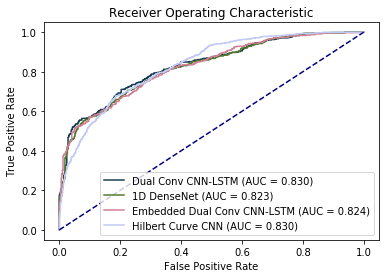

In [5]:
palette = sns.color_palette("cubehelix", len(roc_list))

#plot roc curve
for i in range(len(roc_list)):
    plt.plot(roc_list[i][0], 
             roc_list[i][1], 
             color=palette[i], 
             label='{0} (AUC = {1:.3f})'.format(label_list[i], roc_list[i][2]))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#plt.savefig('c:/users/wolf/desktop/SynPro/roc.png')
plt.show()